In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Importing dataset 
data = pd.read_csv(r'BTC-SMA30-SMA100')

In [18]:
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['BTCUSD'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['BTCUSD'][i])
                flag = 0 
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return(sigPriceBuy, sigPriceSell)

In [19]:
#Store the buy and sell data into a variable

buy_sell = buy_sell(data)
data['Buy Signal Price'] = buy_sell[0]
data['Sell Signal Price'] = buy_sell[1]

In [20]:
#Show data
data

,Datetime,BTCUSD,SMA30,SMA100,Buy Signal Price,Sell Signal Price
0,2021-01-01 05:00:00+00:00,29198.923828,NaN,NaN,NaN,NaN
1,2021-01-01 06:00:00+00:00,29170.220703,NaN,NaN,NaN,NaN
2,2021-01-01 07:00:00+00:00,29131.013672,NaN,NaN,NaN,NaN
3,2021-01-01 08:00:00+00:00,29087.369141,NaN,NaN,NaN,NaN
4,2021-01-01 09:00:00+00:00,29233.941406,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10139,2022-03-09 00:00:00+00:00,38953.203125,38525.397135,38796.010938,NaN,NaN
10140,2022-03-09 01:00:00+00:00,39167.257812,38585.929036,38793.223906,NaN,NaN
10141,2022-03-09 02:00:00+00:00,39412.699219,38646.611979,38797.566836,NaN,NaN
10142,2022-03-09 03:00:00+00:00,41229.261719,38756.944010,38818.493398,NaN,NaN


TypeError: scatter() missing 1 required positional argument: 'y'

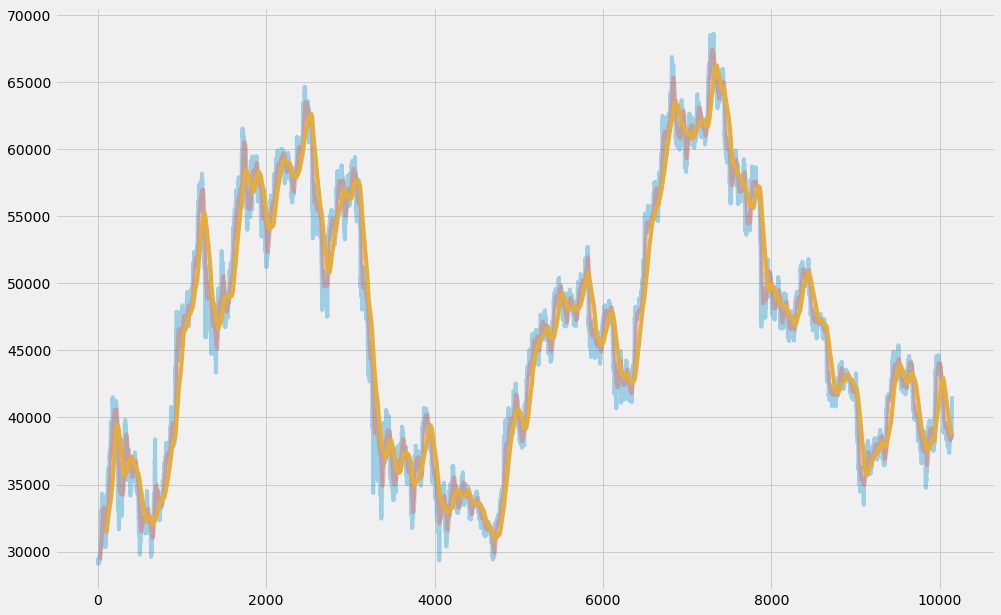

In [22]:
plt.figure(figsize=(15, 10))
plt.plot(data['BTCUSD'], label = 'BTCUSD', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100')
plt.scatter(data.index, data =['Buy_Signal_Price'], label = 'Buy' , marker = '^', color = 'green')
plt.scatter(data.index, data =['Sell_Signal_Price'], label = 'Sell' , marker = 'v', color = 'red')
plt.title('BTCUSD & buy sell Signals') 
plt.xlabel('Jan 1 2021 - Mar 7 2022')
plt.ylabel('Price USD')
plt.legend(loc = 'upper left')
plt.show()